# Регрессионный анализ на градиентном бустинге для прогнозирования стоимости автомобиля

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

### Инструкция по выполнению проекта

Чтобы усилить исследование, не ограничивайтесь градиентным бустингом. Попробуйте более простые модели — иногда они работают лучше. Эти редкие случаи легко пропустить, если всегда применять только бустинг.

Поэкспериментируйте и сравните характеристики моделей: время обучения, время предсказания, точность результата.

**Основные шаги:**

1. Загрузите данные, путь к файлу: */datasets/autos.csv*.
1. Изучите данные. Заполните пропущенные значения и обработайте аномалии в столбцах. Если среди признаков имеются неинформативные, удалите их.
1. Подготовьте выборки для обучения моделей.
1. Обучите разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуйте разные гиперпараметры.
1. Проанализируйте время обучения, время предсказания и качество моделей.
1. Опираясь на критерии заказчика, выберете лучшую модель, проверьте её качество на тестовой выборке.

**Примечания:**

- Для оценки качества моделей применяйте метрику RMSE.
- Значение метрики RMSE должно быть меньше 2500.
- Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.
- Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдите её.
- Модель градиентного бустинга может долго обучаться, поэтому измените у неё только два-три параметра.
- Если перестанет работать Jupyter Notebook, удалите лишние переменные оператором `del`.

### Описание данных

Данные находятся в файле */datasets/autos.csv*.

**Признаки**

1. `DateCrawled` — дата скачивания анкеты из базы
1. `VehicleType` — тип автомобильного кузова
1. `RegistrationYear` — год регистрации автомобиля
1. `Gearbox` — тип коробки передач
1. `Power` — мощность (л. с.)
1. `Model` — модель автомобиля
1. `Kilometer` — пробег (км)
1. `RegistrationMonth` — месяц регистрации автомобиля
1. `FuelType` — тип топлива
1. `Brand` — марка автомобиля
1. `Repaired` — была машина в ремонте или нет
1. `DateCreated` — дата создания анкеты
1. `NumberOfPictures` — количество фотографий автомобиля
1. `PostalCode` — почтовый индекс владельца анкеты (пользователя)
1. `LastSeen` — дата последней активности пользователя

**Целевой признак**

1. `Price` — цена (евро)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Инструкция-по-выполнению-проекта" data-toc-modified-id="Инструкция-по-выполнению-проекта-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Инструкция по выполнению проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Настройка-тетради" data-toc-modified-id="Настройка-тетради-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Настройка тетради</a></span></li><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Проверка-результатов-предобработкаи-данных" data-toc-modified-id="Проверка-результатов-предобработкаи-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка результатов предобработкаи данных</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Полезные-функции-подготовки-данных-и-подбора-моделей-и-их-параметров" data-toc-modified-id="Полезные-функции-подготовки-данных-и-подбора-моделей-и-их-параметров-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Полезные функции подготовки данных и подбора моделей и их параметров</a></span></li><li><span><a href="#Функции-моделей" data-toc-modified-id="Функции-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Функции моделей</a></span></li><li><span><a href="#Применение-функций" data-toc-modified-id="Применение-функций-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Применение функций</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Выводы-проекта" data-toc-modified-id="Выводы-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы проекта</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Подготовка данных

### Настройка тетради

In [1]:
# Базовые библиотеки
import pandas as pd # Датафреймы
import numpy as np # Математика для массивов
from math import factorial # Факториалы
from scipy import stats as st # Статистика
import os # Библиотека для оптимизации чтения данных из файла
import time # Расчет времени выполнения функций

# Pipeline (пайплайн)
from sklearn.pipeline import(
    Pipeline, # Pipeline с ручным вводом названий шагов.
    make_pipeline # Pipeline с автоматическим названием шагов.
)
# Функция для поддержки экспериментальной функции HavingGridSearchSV
from sklearn.experimental import enable_halving_search_cv
# Ускоренная автоматизация поиска лучших моделей и их параметров
from sklearn.model_selection import HalvingGridSearchCV
# Ускоренная автоматизация рандомного поиска лучших моделей и их параметров
from sklearn.model_selection import HalvingRandomSearchCV

# Автоматизация раздельного декодирования признаков
from sklearn.compose import(
    make_column_selector, 
    make_column_transformer, 
    ColumnTransformer
)

# Обработка данных для машинного обучения
# Стандартизация данных
import re
#! pip install sklearn.preprocessing 
from sklearn.preprocessing import(
    OneHotEncoder, # Создание отдельных столбцов для каждого категориального значения, drop='first' (удаление первого столбца против dummy-ловушки), sparse=False (?)
    OrdinalEncoder, # Кодирование порядковых категориальных признаков
    #TargetEncoder, # Кодирование категорий на основе таргетов (ошибка, модуль не найден) 
    LabelEncoder, 
    StandardScaler, 
    MinMaxScaler
)
# Кодирование категорий на основе таргетов 
!pip install -U category_encoders
from category_encoders.target_encoder import TargetEncoder
# Другие функции предобработки данных
from sklearn.impute import KNNImputer # Заполнение пропусков в данных методом k-блжиайших соседей.
from sklearn.utils import shuffle # Перемешивание данных для уравновешивания их в разных выборках
from statsmodels.stats.outliers_influence import variance_inflation_factor # Коэффициент инфляции дисперсии (5 и более - признак коррелирует со всеми остальными, его можно удалить и выразить через другие признаки)
from sklearn.model_selection import(
    GridSearchCV, # Поиск гиперпараметров по сетке (GridSearch)
    train_test_split, # Разделение выборок с целевыми и нецелевыми признаками на обучающую и тестовую
    validation_curve, 
    StratifiedKFold, # Кроссвалидация с указанием количества фолдов (частей, на которые будет разбита обучающая выборка, одна из которых будет участвовать в валидации)
    KFold, # Кроссвалидация 
    cross_val_score # Оценка качества модели на кроссвалидации
)

# Различные модели машинного обучения (в данном проекте требуется регрессия)
# (есть разбор на https://russianblogs.com/article/83691573909/)
# Линейная модель
from sklearn.linear_model import(
    #LogisticRegression, # Линейная классификация
    LinearRegression, # Линейная регрессия
    Ridge , # Линейная регрессия. "Хребтовая" регрессия (метод наименьших квадратов)
    BayesianRidge , # Линейная регрессия. Байесовская "хребтовая" регрессия (максимизации предельного логарифмического правдоподобия)
    SGDRegressor # Линейная регрессия. SGD - Стохастический градиентный спуск (минимизирует регуляризованные эмпирические потери за счет стохастического градиентного спуска)
)
# Решающее дерево
from sklearn.tree import(
    #DecisionTreeClassifier, # Решающее дерево. Классификация
    DecisionTreeRegressor # Решающее дерево. Регрессия
)
# Случайный лес
from sklearn.ensemble import(
    #RandomForestClassifier, # Случайный лес. Классификация
    RandomForestRegressor # Случайный лес. Регрессия
)
# Машина опорных векторов
from sklearn.svm import(
    SVR # # Линейная модель. Регрессия с использованием опорных векторов
)
# Нейронная сеть
from sklearn.neural_network import(
    MLPRegressor # Нейронная сеть. Регрессия
)
# CatBoost (made in Yandex)
from catboost import(
    CatBoostRegressor # CatBoost (Яндекс). Регрессия
)
# LightGBM
from lightgbm import(
    LGBMRegressor # LightGBM. Регрессия
)

# Метрики (Показатели качества моделей)
from sklearn.metrics import(
    # Метрики для моделей регрессии
    mean_absolute_error, # MAE, Средняя абсолютная ошибка (не чувствительная к выбросам)
    mean_absolute_percentage_error, # MAPE, Средняя абсолютная ошибка в % (универсальная в %)
    mean_squared_error, # MSE, Средняя квадратичная ошибка (дисперсия, чувствительная к выбросам), RMSE (сигма) = mean_squared_error(test_y, preds, squared=False)
    r2_score, # R^2, Коэффициент детерминации (универсальная в %, чувствительная к выбросам, может быть отрицательной и возвращать NaN)
    
    # Другое
    make_scorer, # Функция для использования собственных функций в параметре scoring функции HalvingGridSearchCV
    ConfusionMatrixDisplay
)

# Визуализация графиков
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault
from pandas.plotting import scatter_matrix

# Для поиска совпадений 
# в названиях населённых пунктов
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Улучшенная функция 
# определения корреляции
# (возвращает сообщение о том, 
# что модуль не найден) 
!pip3 install phik
import phik 


     |████████████████████████████████| 81 kB 1.1 MB/s eta 0:00:011


/opt/conda/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


     |████████████████████████████████| 679 kB 953 kB/s eta 0:00:01


In [2]:
# Отображение всех столбцов таблицы
pd.set_option('display.max_columns', None)
# Обязательно для нормального отображения графиков plt
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
# Дополнительно и не обязательно для декорирования графиков
factor = .8
default_dpi = rcParamsDefault['figure.dpi']
rcParams['figure.dpi'] = default_dpi * factor

# Глобальная переменная 
# для функций со случайными значениями
STATE = 42


### Загрузка и изучение данных

In [3]:
# Загрузка данных
def read_csv_file(path1, path2):
    if os.path.exists(path1):
        data = pd.read_csv(path1)
    elif os.path.exists(path2):
        data = pd.read_csv(path2)
    else:
        print('Файл не найден')
    return data

data = read_csv_file(
    '/datasets/autos.csv', 
    'datasets/autos.csv'
)

In [4]:
# Первичный анализ данных
print(data.info()) 
data.head(10) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


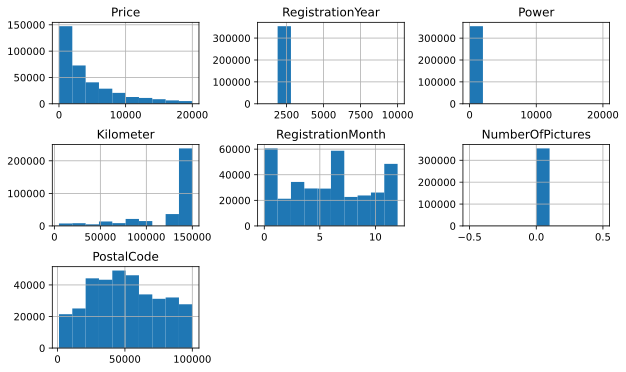

In [5]:
# Анализ значений датафрейма
data.hist() 
plt.subplots_adjust(wspace=.4, hspace=.5)

data.describe() 

In [6]:
# Подсчёт пропусков
data_shape = data.shape[0]
print('Всего объектов:', data_shape) 
print() 
print('Количество объектов с пропусками в признаках:') 
for i in data.columns:
    if data_shape - data[i].loc[data[i].notna()].shape[0] > 0:
        _a = data_shape - data[i].loc[data[i].notna()].shape[0]
        _b = int((1 - data[i].loc[data[i].notna()].shape[0] / data_shape) * 100) 
        _c = data[i].dtype
        print(f'{i} ({_c})\t= {_a} ({_b}%)') 


Всего объектов: 354369

Количество объектов с пропусками в признаках:
VehicleType (object)	= 37490 (10%)
Gearbox (object)	= 19833 (5%)
Model (object)	= 19705 (5%)
FuelType (object)	= 32895 (9%)
Repaired (object)	= 71154 (20%)


In [7]:
# Анализ значений атрибута "RegistrationYear" 
print('Уникальные значения атрибута "RegistrationYear":') 
print(np.sort(data['RegistrationYear'].unique())) 
print() 
print('Количество значений атрибута "RegistrationYear", которые меньше 1990 и больше 2023:',  
      data.loc[
          (data['RegistrationYear'] < 1900) |
          (data['RegistrationYear'] > 2023), 
          'RegistrationYear'
      ].count(), 
      'это', 
      (data.loc[
          (data['RegistrationYear'] < 1900) |
          (data['RegistrationYear'] > 2023), 
          'RegistrationYear'
      ].count() / data_shape) * 100, '%' 
     ) 


Уникальные значения атрибута "RegistrationYear":
[1000 1001 1039 1111 1200 1234 1253 1255 1300 1400 1500 1600 1602 1688
 1800 1910 1915 1919 1920 1923 1925 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1940 1941 1942 1943 1944 1945 1946 1947 1948
 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2066 2200 2222 2290 2500 2800 2900 3000 3200 3500 3700 3800 4000
 4100 4500 4800 5000 5300 5555 5600 5900 5911 6000 6500 7000 7100 7500
 7800 8000 8200 8455 8500 8888 9000 9229 9450 9996 9999]

Количество значений атрибута "RegistrationYear", которые меньше 1990 и больше 2023: 171 это 0.048254785266205566 %


In [8]:
# Анализ минимальна значений атрибута "Power" 
string = f"{data.loc[data['Power'] < .75, 'Power'].count()} объектов имеют мощность двигателя меньше 0.75 л.с. "
string += f"Это {data.loc[data['Power'] < .75, 'Power'].count() / data_shape * 100}% от всего количества объектов. " 
print(string, '\n')

print('Примеры подобных объектов:') 
data.loc[data['Power'] < .75].head() 

print() 


40225 объектов имеют мощность двигателя меньше 0.75 л.с. Это 11.351162206626427% от всего количества объектов.  

Примеры подобных объектов:



In [9]:
# Анализ максимальная значений атрибута "Power" 
string = f"{data.loc[data['Power'] > 5000, 'Power'].count()} объектов имеют мощность двигателя больше 5000 л.с. "
string += f"Это {data.loc[data['Power'] > 5000, 'Power'].count() / data_shape * 100}% от всего количества объектов. "
print(string, '\n')

print('Примеры подобных объектов:') 
data.loc[data['Power'] > 5000].head() 


82 объектов имеют мощность двигателя больше 5000 л.с. Это 0.023139721589642434% от всего количества объектов.  

Примеры подобных объектов:


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
7661,2016-04-02 19:25:25,1499,small,1999,manual,7515,lupo,150000,4,petrol,volkswagen,NaN,2016-04-02 00:00:00,0,65830,2016-04-06 11:46:49
11039,2016-03-25 19:55:32,0,sedan,1998,manual,10317,other,150000,8,petrol,fiat,no,2016-03-25 00:00:00,0,57520,2016-04-01 19:16:33
25232,2016-03-28 19:57:39,10900,bus,2009,manual,10520,caddy,150000,6,gasoline,volkswagen,no,2016-03-28 00:00:00,0,36272,2016-04-07 02:47:02
33952,2016-03-09 11:37:03,3740,small,2006,manual,6920,aygo,90000,10,NaN,toyota,no,2016-03-09 00:00:00,0,94116,2016-03-17 05:16:32
44520,2016-03-10 22:37:21,2500,convertible,1998,manual,7512,golf,150000,6,NaN,volkswagen,NaN,2016-03-10 00:00:00,0,68239,2016-04-05 15:17:50


In [10]:
# Анализ уникальных значений 
# категориальных текстовых признаков
for i in data.select_dtypes(include='object').columns: 
    print(f'Уникальные значения признака "{i}":', data[i].unique()) 
    print(f'Всего унимальных значений признака "{i}":', len(data[i].unique())) 
    print() 


Уникальные значения признака "DateCrawled": ['2016-03-24 11:52:17' '2016-03-24 10:58:45' '2016-03-14 12:52:21' ...
 '2016-03-21 09:50:58' '2016-03-14 17:48:27' '2016-03-19 18:57:12']
Всего унимальных значений признака "DateCrawled": 271174

Уникальные значения признака "VehicleType": [nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
Всего унимальных значений признака "VehicleType": 9

Уникальные значения признака "Gearbox": ['manual' 'auto' nan]
Всего унимальных значений признака "Gearbox": 3

Уникальные значения признака "Model": ['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' '

In [11]:
# Анализ нефвных совпадений 
# признака "Model"
for i in data['Model'].fillna('no_value').unique():
    print(i, '~', process.extract(i, data['Model'].fillna('no_value').unique(), limit=3)) 


golf ~ [('golf', 100), ('gl', 67), ('twingo', 60)]
no_value ~ [('no_value', 100), ('altea', 60), ('lupo', 51)]
grand ~ [('grand', 100), ('panda', 60), ('logan', 60)]
fabia ~ [('fabia', 100), ('ibiza', 60), ('agila', 60)]
3er ~ [('3er', 100), ('5er', 67), ('1er', 67)]
2_reihe ~ [('2_reihe', 100), ('3_reihe', 86), ('z_reihe', 86)]
other ~ [('other', 100), ('transporter', 72), ('boxster', 67)]
c_max ~ [('c_max', 100), ('s_max', 80), ('b_max', 80)]
3_reihe ~ [('3_reihe', 100), ('2_reihe', 86), ('z_reihe', 86)]
passat ~ [('passat', 100), ('tt', 60), ('arosa', 55)]
navara ~ [('navara', 100), ('rav', 72), ('niva', 68)]
ka ~ [('ka', 100), ('kadett', 90), ('kangoo', 90)]
polo ~ [('polo', 100), ('doblo', 67), ('toledo', 60)]
twingo ~ [('twingo', 100), ('elefantino', 72), ('citigo', 67)]
a_klasse ~ [('a_klasse', 100), ('e_klasse', 88), ('b_klasse', 88)]
scirocco ~ [('scirocco', 100), ('cc', 90), ('clio', 68)]
5er ~ [('5er', 100), ('3er', 67), ('1er', 67)]
meriva ~ [('meriva', 100), ('materia', 77

In [12]:
# Анализ нефвных совпадений 
# признака "Brand"
for i in data['Brand'].unique():
    print(i, '~', process.extract(i, data['Brand'].unique(), limit=3)) 


volkswagen ~ [('volkswagen', 100), ('volvo', 54), ('opel', 45)]
audi ~ [('audi', 100), ('hyundai', 60), ('subaru', 51)]
jeep ~ [('jeep', 100), ('peugeot', 36), ('chevrolet', 31)]
skoda ~ [('skoda', 100), ('honda', 60), ('kia', 50)]
bmw ~ [('bmw', 100), ('volkswagen', 30), ('mazda', 30)]
peugeot ~ [('peugeot', 100), ('opel', 45), ('seat', 45)]
ford ~ [('ford', 100), ('mercedes_benz', 45), ('alfa_romeo', 45)]
mazda ~ [('mazda', 100), ('lada', 67), ('audi', 44)]
nissan ~ [('nissan', 100), ('saab', 51), ('seat', 45)]
renault ~ [('renault', 100), ('seat', 55), ('sonstige_autos', 51)]
mercedes_benz ~ [('mercedes_benz', 100), ('ford', 45), ('seat', 45)]
opel ~ [('opel', 100), ('citroen', 51), ('volkswagen', 45)]
seat ~ [('seat', 100), ('smart', 67), ('renault', 55)]
citroen ~ [('citroen', 100), ('opel', 51), ('chevrolet', 50)]
honda ~ [('honda', 100), ('hyundai', 67), ('skoda', 60)]
fiat ~ [('fiat', 100), ('daihatsu', 68), ('kia', 57)]
mini ~ [('mini', 100), ('nissan', 45), ('mitsubishi', 45)

In [13]:
# Проверка коррелируемости
# признаков датафрейма
data.corr() 


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.026916,0.158872,-0.333199,0.110581,NaN,0.076055
RegistrationYear,0.026916,1.000000,-0.000828,-0.053447,-0.011619,NaN,-0.003459
Power,0.158872,-0.000828,1.000000,0.024002,0.043380,NaN,0.021665
Kilometer,-0.333199,-0.053447,0.024002,1.000000,0.009571,NaN,-0.007698
RegistrationMonth,0.110581,-0.011619,0.043380,0.009571,1.000000,NaN,0.013995
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.076055,-0.003459,0.021665,-0.007698,0.013995,NaN,1.000000


**Выводы из анализа данных**

1. Датафрейм содержит 354369 объектов и 16 признаков, 7 из которых являются 64-битными целочисленными, а 9 типа `object`. Целевым является целочисленный признак `Price`. 
1. В данных есть пропуски. Их количество в разных признаках более 1% от всего количества. Поэтому, их нельзя удалить, а требуется заменить на значение `no_value`. 
1. Категориальные признаки `VehicleType`, `FuelType` и `Model` имеют значения `other`, которые можно изменить на `no_value` также, как и пропуски.
1. По мнению автора данной работы, следующие признаки могут быть неинформативными для моделей машинного обучения:
 1. `DateCrawled` — дата скачивания анкеты из базы (может влиять на цену относительно даты размещения объявления, но незначительно)
 1. `RegistrationMonth` — месяц регистрации автомобиля (большее значение имеет год регистрации)
 1. `DateCreated` — дата создания анкеты (в целях предсказания цен автомобилей в будущих анкетах эта информация не акутальна)
 1. `NumberOfPictures` — количество фотографий автомобиля (может влиять на цену, т.к. фотографии продоваемого объекта вызывают доверие, но признак содержит только нули)
 1. `PostalCode` — почтовый индекс владельца анкеты (может влиять, если местоположение продавца и покупателя имеет значение, но это не точно)
 1. `LastSeen` — дата последней активности пользователя (может указывать на продолжительность наличия объявления в сети, но этот признак в меньшей степени может влиять на цену, чем другие признаки, описывающие характеристики продаваемого авто)
1. Числовые данные не распределены нормально и имеют выбросы. 
1. Числовые признаки имеют разный диапазон. Для использования в машинном обучении их требуется стандартизировать. 
1. Корреляция аттрибутов между собой и с целевым признаком слабая. Наибольшей обратной корреляцией с целевым признаком обладают признаки `RegistrationYear`.
1. Анализ текстовых категриальных признаков `Model` и `Brand` выявил неявное совпадение значений `range_rover` и `rangerover` в признаке `Model`. Эти значения следует объеденить в `range_rover`.
1. Названия признаков не в "змеином" стиле. Можно привести их в соответствие со "змеиный" стилем.  

Данные с пропусками:
1. `VehicleType` — тип автомобильного кузова
1. `Gearbox` — тип коробки передач
1. `Model` — модель автомобиля
1. `FuelType` — тип топлива
1. `Repaired` — была машина в ремонте или нет

Все признаки с пропусками категориального типа `object`. Для них будет использована категория `no_value`, указывающая на отсутствие значений.

Ненормальности в данных:
1. Атрибут `RegistrationYear` содержит 171 значение с годами производства автомобилей меньше 1900 года и больше 2023 года. Объектами с этими значениями можно принебречь, т.к. их мне 1% от всего количества объектов. Их требуется удалить. 
1. Атрибут `Power` содержит более 11% значений с мощностью двигателя выходящую за пределы известных значейни. Например, меньше, чем у самого маломощного автомобиля "Benz Patent Motorwagen", у которого мощность двигателя равна 0.75 л.с.  (*https://1gai-ru.turbopages.org/turbo/1gai.ru/s/blog/cars/513900-desyat-samyh-malomoschnyh-avtomobiley.html*, 2023). Также атрибут `Power`содержит значения мощности двигателя более 5000 л.с.. Это превышает мощность самого мощного автомобиля Devel Sixteen (*https://www.driver-helper.ru/text/sovetiy/top-10-samyx-moshhnyx-serijnyx-avto-v-mire*). Учитывая большую долю подобных объектов и тот факт, что подобные объекты могут появиться в эксплуатационном данных, вместо того, чтобы от них избавляться, в них следует заменить ненормальные значения `Power` на медианные для каждой группы связки `Brand` `Model`.

### Предобработка данных

In [14]:
# Замена пропусков 
# на значение "no_value" 
for i in data.columns:
    if data_shape - data[i].loc[data[i].notna()].shape[0] > 0:
        data.loc[data[i].isna(), i] = 'no_value'


In [15]:
# Замена значения "other" на "no_value" 
# для унификации отсутствующей информации 
# в признаках "VehicleType" и "FuellType"
data.loc[
    (data['VehicleType'] == 'other') | 
    (data['FuelType'] == 'other') |
    (data['Model'] == 'other'), 
    ['VehicleType', 'FuelType', 'Model'] 
] = 'no_value' 


In [16]:
# Определение максимальной даты просмотра объявления 
# для установки в качестве предельного срока 
# выпуска автомобиля
data['DateCrawled'] = pd.to_datetime(
    data['DateCrawled'], format='%Y-%m-%dT%H:%M:%S'
)
date_crawled_max = data['DateCrawled'].max()
date_crawled_max


Timestamp('2016-04-07 14:36:58')

In [17]:
# Удаление неинформативных признаков
data = data.drop([
    'DateCrawled', 
    'RegistrationMonth', 
    'DateCreated', 
    'NumberOfPictures', 
    'PostalCode', 
    'LastSeen'
], axis=1)


In [18]:
# Удаление ненормальностей в данных
# признака "RegistrationYear"
data = data.loc[
    (data['RegistrationYear'] > 1900) & 
    (data['RegistrationYear'] < date_crawled_max.year)
]


In [19]:
# Замена ненормальностей в данных 
# признака "Power" в более 10% объектов

#power_group_median = data.groupby(['Brand', 'Model'])['Power'].median()
power_group_median = data.pivot_table(values='Power', index=['Brand', 'Model'], aggfunc='median')

for i in power_group_median.index:
    data['Power'] = np.where(
        ((data['Power'] < .75) | (data['Power'] > 5000)) & 
        ((data['Power'] == i[0]) & (data['Model'] == i[1])), 
        power_group_median.loc[i], 
        data['Power']
    )

data['Power']


0           0.0
1         190.0
2         163.0
3          75.0
4          69.0
          ...  
354364      0.0
354365      0.0
354366    101.0
354367    102.0
354368    100.0
Name: Power, Length: 330174, dtype: float64

In [20]:
# Объединение неявно совпадающих значений признака "Model" 
# "range_rover" и "rangerover" в "range_rover"
data.loc[data['Model'] == 'rangerover', 'Model'] = 'range_rover'


In [21]:
# Приведение названий признаков датафрейма
# к "змеиному" стилю
data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in data.columns] 


### Проверка результатов предобработкаи данных

In [22]:
# Проверка изменений
data.info() 
data.head(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 330174 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              330174 non-null  int64  
 1   vehicle_type       330174 non-null  object 
 2   registration_year  330174 non-null  int64  
 3   gearbox            330174 non-null  object 
 4   power              330174 non-null  float64
 5   model              330174 non-null  object 
 6   kilometer          330174 non-null  int64  
 7   fuel_type          330174 non-null  object 
 8   brand              330174 non-null  object 
 9   repaired           330174 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 27.7+ MB


,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,no_value,1993,manual,0.0,golf,150000,petrol,volkswagen,no_value
1,18300,coupe,2011,manual,190.0,no_value,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163.0,grand,125000,gasoline,jeep,no_value
3,1500,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102.0,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109.0,2_reihe,150000,petrol,peugeot,no
7,0,no_value,1980,manual,50.0,no_value,40000,no_value,volkswagen,no
8,14500,bus,2014,manual,125.0,c_max,30000,petrol,ford,no_value
9,999,small,1998,manual,101.0,golf,150000,no_value,volkswagen,no_value


,price,registration_year,power,kilometer
count,330174.000000,330174.000000,330174.000000,330174.000000
mean,4540.116554,2002.089226,111.900141,127920.581269
std,4564.387345,6.802931,182.410180,37913.642129
min,0.000000,1910.000000,0.000000,5000.000000
25%,1149.000000,1999.000000,70.000000,125000.000000
50%,2850.000000,2002.000000,105.000000,150000.000000
75%,6500.000000,2007.000000,143.000000,150000.000000
max,20000.000000,2015.000000,20000.000000,150000.000000


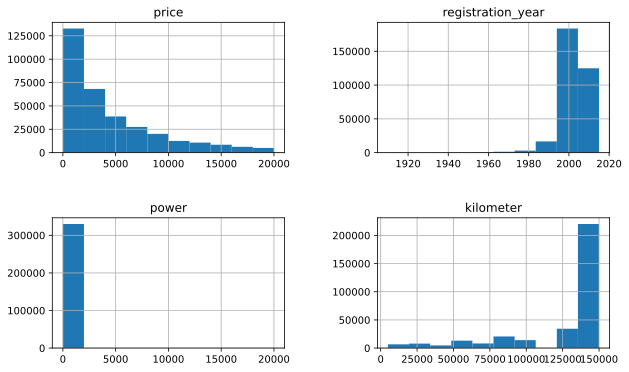

In [23]:
# Проверка изменений
data.hist() 
plt.subplots_adjust(wspace=.4, hspace=.5)

data.describe() 


In [24]:
# Анализ уникальных значений 
# категориальных текстовых признаков
for i in data.select_dtypes(include='object').columns: 
    print(f'Уникальные значения признака "{i}":', data[i].unique()) 
    print(f'Всего унимальных значений признака "{i}":', len(data[i].unique())) 
    print() 


Уникальные значения признака "vehicle_type": ['no_value' 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon']
Всего унимальных значений признака "vehicle_type": 8

Уникальные значения признака "gearbox": ['manual' 'auto' 'no_value']
Всего унимальных значений признака "gearbox": 3

Уникальные значения признака "model": ['golf' 'no_value' 'grand' 'fabia' '3er' '2_reihe' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'twingo' 'a_klasse' 'scirocco' '5er' 'arosa'
 'civic' 'transporter' 'punto' 'e_klasse' 'corsa' 'one' 'fortwo' 'clio'
 '1er' 'b_klasse' 'signum' 'astra' 'a8' 'jetta' 'polo' 'fiesta' 'c_klasse'
 'micra' 'sprinter' '156' 'escort' 'forester' 'xc_reihe' 'scenic' 'a4'
 'a1' 'insignia' 'combo' 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80'
 '147' '100' 'meriva' 'z_reihe' 'sorento' 'v40' 'ibiza' 'mustang' 'eos'
 'vito' 'touran' 'getz' 'a3' 'megane' 'lupo' 'r19' 'caddy' 'mondeo'
 'cordoba' 'colt' 'impreza' 'vectra' 'berlingo' 'tiguan' 'sharan'
 '6_reihe' 'c4' 'panda' 'up' 'i_reihe

In [25]:
# Анализ количества 
# удалённых объектов
print('Всего удалённо объектов:', data_shape - data.shape[0]) 
print(f'Доля удалённых объектов: {(1 - data.shape[0] / data_shape)*100}%') 


Всего удалённо объектов: 24195
Доля удалённых объектов: 6.827628827578036%


In [26]:
# Анализ коррляции признаков 
# после предобработки данных
data.corr()


,price,registration_year,power,kilometer
price,1.000000,0.490673,0.164822,-0.336981
registration_year,0.490673,1.000000,0.067158,-0.220855
power,0.164822,0.067158,1.000000,0.027308
kilometer,-0.336981,-0.220855,0.027308,1.000000


In [27]:
# Анализ коррляции признаков 
# после предобработки данных
data.phik_matrix()


interval columns not set, guessing: ['price', 'registration_year', 'power', 'kilometer']


,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
price,1.000000,0.276073,0.609296,0.305974,0.005928,0.567335,0.311190,0.263280,0.356071,0.366852
vehicle_type,0.276073,1.000000,0.209775,0.336422,0.005379,0.942273,0.164271,0.573069,0.644883,0.207384
registration_year,0.609296,0.209775,1.000000,0.146034,0.000000,0.574288,0.307834,0.274391,0.356596,0.235890
gearbox,0.305974,0.336422,0.146034,1.000000,0.008489,0.626205,0.070258,0.282519,0.523394,0.482828
power,0.005928,0.005379,0.000000,0.008489,1.000000,0.000000,0.000000,0.000000,0.002184,0.013631
model,0.567335,0.942273,0.574288,0.626205,0.000000,1.000000,0.437192,0.711109,0.997654,0.281206
kilometer,0.311190,0.164271,0.307834,0.070258,0.000000,0.437192,1.000000,0.137378,0.276410,0.226748
fuel_type,0.263280,0.573069,0.274391,0.282519,0.000000,0.711109,0.137378,1.000000,0.355297,0.194107
brand,0.356071,0.644883,0.356596,0.523394,0.002184,0.997654,0.276410,0.355297,1.000000,0.164810
repaired,0.366852,0.207384,0.235890,0.482828,0.013631,0.281206,0.226748,0.194107,0.164810,1.000000


**Выводы из преварительной добработки данных**

Датафрейм был успешно оптимизирован и подготовлен к использованию в машинном обучении:
1. Все неопределенные значения во всех признаках заменены на `no_value`.
1. Удалены неинформативные признаки `DateCrawled`, `RegistrationMonth`, `DateCreated`, `NumberOfPictures`, `PostalCode`, `LastSeen`.
1. Удален 171 объект с датой регистрации автомобиля в признаке `RegistrationYear` меньше 1900 года и старше 2023 года.
1. Заменены значения признака `Power` с мощностью двигателя менее 0.75 л.с. и более 5000 на медианные значения групп `Brand` + `Model`.
1. Изменены неявно совпадающие значения `range_rover` и `rangerover` признака `Model` на значение `range_rover`. 
1. Названия признаков приведены к "змеиному" стилю.

После предвартиельной обработки данных все числовые признаки имеют среднюю и слабую корреляцию между собой и с целевым признаком. Наибольшей прямой корреляцией с целевым признаком обладает признак `registration_year`, а обратной корреляцией `kilometer`. После предварительной обработки данных стало очевидным то, что требуется все категориальные признаки кодировать с помощью технологии One Hot Encoding.

## Обучение моделей

### Полезные функции подготовки данных и подбора моделей и их параметров

In [28]:
# Функция для кодирования категориальных текстовых признаков
# с помощью технологии One Hot Encoding (pd.get_dummies())
def features_get_dummies(features, column_name):
    features = features.join(
        pd.get_dummies(
            data[column_name], 
            prefix=column_name, 
            prefix_sep='_', 
            drop_first=True
        )
    )
    features = features.drop(column_name, axis=1)
    return features


In [29]:
# Функция подготовки данных перед подбором моделей и их параметров
def data_preprocessing(data, target_name):
    
    # Перемешивание объектов 
    # для их лучшего распределения в выборках
    data = shuffle(data, random_state=STATE)
    
    # Разделение датафреймов на целевую и нецелевую выборку
    features = data.drop([target_name], axis=1)
    target = data[target_name]

    # Разделение целевой и нецелевой выборки 
    # на обучающие и тестовые выборки
    features_train,  features_test, target_train, target_test = train_test_split(
        features, 
        target, 
        test_size=.25, 
        random_state=STATE
    )
    
    return features_train,  features_test, target_train, target_test


In [30]:
# Функция создания структуры пайплайна
def params_and_model_selection(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    model_params
):
    
    start_time = time.time()
    #funtion_time = %timeit
    
    # Стандартизация числовых значений
    numeric_transformer = make_pipeline(
        StandardScaler()
    )
    
    # Шаг препроцессинга в Пайплайне
    preprocessor = make_column_transformer(
        (numeric_transformer, features_train.columns)
    )
    
    # Pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor), 
        ('regressor', model_params[0]['regressor'][0])
    ])
    pipe.fit(features_train, target_train)
    #predict = pipe.predict(features_test) # спорно, т.к. это должно быть в результате, а здесь должна использоваться валидационная выборка
    
    # Передача функции ошибки через make_scorer в HalvingGridSearchCV
    smape_score = make_scorer(
        mean_squared_error, 
        squared=False # Для RMSE
    )
    
    # HalvingGridSearchCV
    # (о подборе оптимальных параметров:
    # https://scikit-learn.ru/3-2-tuning-the-hyper-parameters-of-an-estimator/)
    #grid = HalvingRandomSearchCV(
    grid = HalvingGridSearchCV(
        pipe, 
        model_params, 
        cv=4, # параметр KFold для кроссвалидации (обучющая и валидационная выборки 75:25)
        n_jobs=-1, # количество параллельно выполняемых заданий (-1 - задействованы все процессоры)
        scoring=smape_score, # Передача функции ошибки через make_scorer в HalvingGridSearchCV
        error_score='raise', #0 , # 
        random_state=STATE
    )
    grid.fit(features_train, target_train)
    
    finish_time = time.time()
    funtion_time = finish_time - start_time
    
    return grid, funtion_time


In [31]:
# Вывод на печать результатов модели
def print_model_result(grids, data_times, model_name):
    print('Модель   :', model_name)
    print('RMSE     :', grids[-1].best_score_)
    print(f'Время    : {data_times[-1]} секунд')
    print('Параметры:\n', grids[-1].best_estimator_)
    print()
    print('-'*20)
    print()


### Функции моделей

In [32]:
# LinearRegression
def grids_LinearRegression(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    grids, 
    data_times
):
    
    grid, time_best = params_and_model_selection(
        features_train, 
        features_test, 
        target_train, 
        target_test, 
        [{
            'regressor': [LinearRegression()] # score: R^2
        }]
    )
    
    grids.append(grid)
    data_times.append(time_best)
    
    return grids, data_times


In [33]:
# DecisionTreeRegressor
def grids_DecisionTreeRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    grids, 
    data_times
):
    
    grids_this = 0
    grids_best = 0
    funtion_time = 0
    time_best = 0
    
    # Поиск "regressor__max_depth"
    
    range_min = 1
    range_max = 201
    range_step = 20
    
    for i in range(1, 5, 1):
        # Поиск лучших параметров
        grids_this, funtion_time = params_and_model_selection(
            features_train, 
            features_test, 
            target_train, 
            target_test, 
            [{
                'regressor': [DecisionTreeRegressor(random_state=STATE)], # score: R^2
                'regressor__max_depth': range(
                    range_min, 
                    range_max, 
                    range_step
                )
            }]
        )
        # Выбор лучшей модели
        if grids_best == 0:
            grids_best = grids_this
            time_best = funtion_time
        elif grids_this.best_score_ > grids_best.best_score_:
            grids_best = grids_this
            time_best = funtion_time
        if range_step == 1: break
        # Выбор параметров поиска
        regressor__max_depth = grids_this.best_params_['regressor__max_depth']
        if int(regressor__max_depth - range_step / 2) > 0:
            range_min = int(regressor__max_depth - range_step / 2)
        else:
            range_min = regressor__max_depth
        range_max = int(regressor__max_depth + range_step / 2) + 1
        range_step = int(range_step / 2)
    
    grids.append(grids_best)
    data_times.append(time_best)
    
    return grids, data_times


In [34]:
# RandomForestRegressor
def grids_RandomForestRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    grids, 
    data_times
):
    
    grids_this = 0
    grids_best = 0
    funtion_time = 0
    time_best = 0
    
    # Поиск "regressor__max_depth"
    
    range_min = 20
    range_max = 61
    range_step = 20
    
    for i in range(1, 5, 1):
        
        # Поиск лучших параметров
        grids_this, funtion_time = params_and_model_selection(
            features_train, 
            features_test, 
            target_train, 
            target_test, 
            [{
                'regressor': [RandomForestRegressor(random_state=STATE)], # score: R^2
                'regressor__max_depth': range(
                    range_min, 
                    range_max, 
                    range_step
                ), 
                'regressor__n_estimators': [1]
            }]
        )
        # Выбор лучшей модели
        if grids_best == 0:
            grids_best = grids_this
            time_best = funtion_time
        elif grids_this.best_score_ > grids_best.best_score_: 
            grids_best = grids_this
            time_best = funtion_time
        if range_step == 1: break
        # Выбор параметров поиска
        regressor__max_depth = grids_this.best_params_['regressor__max_depth']
        if int(regressor__max_depth - range_step / 2) > 0:
            range_min = int(regressor__max_depth - range_step / 2)
        else:
            range_min = regressor__max_depth
        range_max = int(regressor__max_depth + range_step / 2) + 1
        range_step = int(range_step / 2)
        if range_step == 0: range_step = 1
    
    # Поиск "regressor__n_estimators"
    
    range_min = 10
    range_max = 31
    range_step = 10
    
    for i in range(1, 5, 1):
        
        # Поиск лучших параметров
        grids_this, funtion_time = params_and_model_selection(
            features_train, 
            features_test, 
            target_train, 
            target_test, 
            [{
                'regressor': [RandomForestRegressor(random_state=STATE)], # score: R^2
                'regressor__max_depth': [regressor__max_depth], 
                'regressor__n_estimators': range(
                    range_min, 
                    range_max, 
                    range_step
                )
            }]
        )
        # Выбор лучшей модели
        if grids_best == 0: 
            grids_best = grids_this
            time_best = funtion_time
        elif grids_this.best_score_ > grids_best.best_score_: 
            grids_best = grids_this
            time_best = funtion_time
        if range_step == 1: break
        # Выбор параметров поиска
        regressor__n_estimators = grids_this.best_params_['regressor__n_estimators']
        if int(regressor__n_estimators - range_step / 2) > 0:
            range_min = int(regressor__n_estimators - range_step / 2)
        else:
            range_min = regressor__n_estimators
        range_max = int(regressor__n_estimators + range_step / 2) + 1
        range_step = int(range_step / 10)
        if range_step == 0: range_step = 1
    
    grids.append(grids_best)
    data_times.append(time_best)
    
    return grids, data_times


In [35]:
# SGDRegressor
def grids_SGDRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    grids, 
    data_times
):
    
    # Поиск лучших параметров
    
    grids_best, time_best = params_and_model_selection(
        features_train, 
        features_test, 
        target_train, 
        target_test, 
        [{
            'regressor': [SGDRegressor()]
        }]
    )
    
    grids.append(grids_best)
    data_times.append(time_best)
    
    return grids, data_times


In [36]:
# MLPRegressor
def grids_MLPRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    grids, 
    data_times
):
    
    # Поиск лучших параметров
    
    grids_best, time_best = params_and_model_selection(
        features_train, 
        features_test, 
        target_train, 
        target_test, 
        [{
            'regressor': [MLPRegressor()]
        }]
    )
    
    grids.append(grids_best)
    data_times.append(time_best)
    
    return grids, data_times


In [37]:
# CatBoostRegressor
def grids_CatBoostRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    grids, 
    data_times
):
    
    
    grids_best, time_best = params_and_model_selection(
        features_train, 
        features_test, 
        target_train, 
        target_test, 
        [{
            'regressor': [CatBoostRegressor()]
        }]
    )
    
    
    grids.append(grids_best)
    data_times.append(time_best)
    
    return grids, data_times


In [38]:
# LGBMRegressor
def grids_LGBMRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    grids, 
    data_times
):
    
    # Поиск лучших параметров
    
    grids_this = 0
    grids_best = 0
    funtion_time = 0
    time_best = 0
    
    # Поиск "regressor__max_depth"
    
    range_min = 1
    range_max = 201
    range_step = 20
    
    for i in range(1, 5, 1):
        
        #print('regressor__max_depth =', range(range_min, range_max, range_step))
        
        # Поиск лучших параметров
        grids_this, funtion_time = params_and_model_selection(
            features_train, 
            features_test, 
            target_train, 
            target_test, 
            [{
                'regressor': [LGBMRegressor(random_state=STATE)], # score: R^2
                'regressor__max_depth': range(
                    range_min, 
                    range_max, 
                    range_step
                ), 
                'regressor__n_estimators': [1]
            }]
        )
        # Выбор лучшей модели
        if grids_best == 0: 
            grids_best = grids_this
            time_best = funtion_time
        elif grids_this.best_score_ > grids_best.best_score_: 
            grids_best = grids_this
            time_best = funtion_time
        if range_step == 1: break
        # Выбор параметров поиска
        regressor__max_depth = grids_this.best_params_['regressor__max_depth']
        if int(regressor__max_depth - range_step / 2) > 0:
            range_min = int(regressor__max_depth - range_step / 2)
        else:
            range_min = regressor__max_depth
        range_max = int(regressor__max_depth + range_step / 2) + 1
        range_step = int(range_step / 2)
        if range_step == 0: range_step = 1
    
    # Поиск "regressor__n_estimators"
    
    range_min = 1
    range_max = 51
    range_step = 10
    
    for i in range(1, 5, 1):
        
        #print('regressor__n_estimators =', range(range_min, range_max, range_step))
        
        # Поиск лучших параметров
        grids_this, funtion_time = params_and_model_selection(
            features_train, 
            features_test, 
            target_train, 
            target_test, 
            [{
                'regressor': [LGBMRegressor(random_state=STATE)], # score: R^2
                'regressor__max_depth': [regressor__max_depth], 
                'regressor__n_estimators': range(
                    range_min, 
                    range_max, 
                    range_step
                )
            }]
        )
        # Выбор лучшей модели
        if grids_best == 0: 
            grids_best = grids_this
            time_best = funtion_time
        elif grids_this.best_score_ > grids_best.best_score_: 
            grids_best = grids_this
            time_best = funtion_time
        if range_step == 1: break
        # Выбор параметров поиска
        regressor__n_estimators = grids_this.best_params_['regressor__n_estimators']
        if int(regressor__n_estimators - range_step / 2) > 0:
            range_min = int(regressor__n_estimators - range_step / 2)
        else:
            range_min = regressor__n_estimators
        range_max = int(regressor__n_estimators + range_step / 2) + 1
        range_step = int(range_step / 10)
        if range_step == 0: range_step = 1
    
    grids.append(grids_best)
    data_times.append(time_best)
    
    return grids, data_times


### Применение функций

In [39]:
# Подготовка выборок из датафрейма

# Разделение обучающего датафрейма на целевую и нецелевую выборку
features_train,  features_test, target_train, target_test = data_preprocessing(data, 'price')

# Кодирование категориальных текстовых признаков
# с помощью технологии TargetEncoder 
features_encoding = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']
te_fit = TargetEncoder().fit(features_train[features_encoding], target_train)
features_train[features_encoding] = te_fit.transform(features_train[features_encoding])
features_test[features_encoding] = te_fit.transform(features_test[features_encoding])

print(features_train.info())
features_train.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 247630 entries, 223244 to 257691
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vehicle_type       247630 non-null  float64
 1   registration_year  247630 non-null  int64  
 2   gearbox            247630 non-null  float64
 3   power              247630 non-null  float64
 4   model              247630 non-null  float64
 5   kilometer          247630 non-null  int64  
 6   fuel_type          247630 non-null  float64
 7   brand              247630 non-null  float64
 8   repaired           247630 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 18.9 MB
None


,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
223244,4759.405926,2005,6967.682167,190.0,5767.135775,150000,6756.042179,6010.171569,5385.242357
98910,3540.618365,2000,2270.272120,0.0,3793.928198,150000,3394.617204,3261.835992,2672.054560
62348,6827.486197,2010,4081.965033,120.0,3223.449143,80000,3807.829533,3147.120726,5385.242357
318127,4759.405926,2009,4081.965033,143.0,5890.414408,125000,6756.042179,6384.934049,5385.242357
290228,4759.405926,1993,4081.965033,45.0,2604.409468,150000,3394.617204,4530.331913,5385.242357


In [40]:
# Поиск лучших моделей и их параметров
data_grids = []
data_times = []


In [41]:
# LinearRegression (dummy-model)
data_grids, data_times = grids_LinearRegression(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    data_grids, 
    data_times
)
print_model_result(data_grids, data_times, 'LinearRegression')


Модель   : LinearRegression
RMSE     : 3069.23279496429
Время    : 2.045431137084961 секунд
Параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['vehicle_type', 'registration_year', 'gearbox', 'power', 'model',
       'kilometer', 'fuel_type', 'brand', 'repaired'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

--------------------



In [42]:
# DecisionTreeRegressor
data_grids, data_times = grids_DecisionTreeRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    data_grids, 
    data_times
)
print_model_result(data_grids, data_times, 'DecisionTreeRegressor')


Модель   : DecisionTreeRegressor
RMSE     : 3520.5951256556477
Время    : 14.969941139221191 секунд
Параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['vehicle_type', 'registration_year', 'gearbox', 'power', 'model',
       'kilometer', 'fuel_type', 'brand', 'repaired'],
      dtype='object'))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=1, random_state=42))])

--------------------



In [44]:
# SGDRegressor
data_grids, data_times = grids_SGDRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    data_grids, 
    data_times
)
print_model_result(data_grids, data_times, 'SGDRegressor')

Модель   : SGDRegressor
RMSE     : 3089.779746424787
Время    : 5.435046195983887 секунд
Параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['vehicle_type', 'registration_year', 'gearbox', 'power', 'model',
       'kilometer', 'fuel_type', 'brand', 'repaired'],
      dtype='object'))])),
                ('regressor', SGDRegressor())])

--------------------



In [46]:
# CatBoostRegressor
data_grids, data_times = grids_CatBoostRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    data_grids, 
    data_times
)
print_model_result(data_grids, data_times, 'CatBoostRegressor')

Learning rate set to 0.097814
0:	learn: 4268.9324355	total: 101ms	remaining: 1m 41s
1:	learn: 4010.6410460	total: 138ms	remaining: 1m 8s
2:	learn: 3784.1669481	total: 181ms	remaining: 1m
3:	learn: 3579.5232253	total: 218ms	remaining: 54.4s
4:	learn: 3400.3400769	total: 255ms	remaining: 50.7s
5:	learn: 3242.2229009	total: 299ms	remaining: 49.5s
6:	learn: 3101.0951468	total: 336ms	remaining: 47.6s
7:	learn: 2976.0448761	total: 382ms	remaining: 47.3s
8:	learn: 2865.0184049	total: 418ms	remaining: 46s
9:	learn: 2769.5971830	total: 455ms	remaining: 45s
10:	learn: 2688.7300008	total: 496ms	remaining: 44.6s
11:	learn: 2611.4192577	total: 533ms	remaining: 43.8s
12:	learn: 2547.1626659	total: 581ms	remaining: 44.1s
13:	learn: 2486.4814447	total: 618ms	remaining: 43.5s
14:	learn: 2436.7976506	total: 659ms	remaining: 43.3s
15:	learn: 2388.2476102	total: 698ms	remaining: 42.9s
16:	learn: 2349.1750890	total: 734ms	remaining: 42.4s
17:	learn: 2311.5397711	total: 777ms	remaining: 42.4s
18:	learn: 227

In [47]:
# LGBMRegressor
data_grids, data_times = grids_LGBMRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    data_grids, 
    data_times
)
print_model_result(data_grids, data_times, 'LGBMRegressor')

Модель   : LGBMRegressor
RMSE     : 4384.374489966158
Время    : 322.27989077568054 секунд
Параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['vehicle_type', 'registration_year', 'gearbox', 'power', 'model',
       'kilometer', 'fuel_type', 'brand', 'repaired'],
      dtype='object'))])),
                ('regressor',
                 LGBMRegressor(max_depth=1, n_estimators=1, random_state=42))])

--------------------



### Выбор лучшей модели

In [48]:
# Лучшая модель из расчета RMSE
data_grids_best = data_grids[0]
data_times_best = data_times[0]
n = 0
for i in range(0, len(data_grids)-1):
    if data_grids[i].best_score_ < data_grids_best.best_score_: 
    #if (data_grids[i].best_score_ < data_grids_best.best_score_) & (data_times[i] < data_times_best): 
        data_grids_best = data_grids[i]
        data_times_best = data_times[i]

print('Лучшее время : ', data_times_best)
print('Лучшее RMSE  : ', data_grids_best.best_score_)
print('Лучшая модель: ')
data_grids_best


Лучшее время :  204.62451720237732
Лучшее RMSE  :  1726.4647502068021
Лучшая модель: 


HalvingGridSearchCV(cv=4, error_score='raise',
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('pipeline',
                                                                                Pipeline(steps=[('standardscaler',
                                                                                                 StandardScaler())]),
                                                                                Index(['vehicle_type', 'registration_year', 'gearbox', 'power', 'model',
       'kilometer', 'fuel_type', 'brand', 'repaired'],
      dtype='object'))])),
                                              ('regressor',
                                               <catboost.core.CatBoostRegressor object at 0x7fa950219220>)]),
                    n_jobs=-1,
                    param_grid=[{'regressor': [<catboost.core.CatBoostRegressor object at 0x7fa950219220>]}],
                   

In [49]:
start_time = time.time()

# Предсказание лучшей модели
predict = data_grids_best.predict(features_test)

finish_time = time.time()
funtion_time = finish_time - start_time

# Расчет RMSE и времени выполнения предсказания
print('RMSE =', mean_squared_error(target_test, predict, squared=False))
print(f'Время предсказания = {funtion_time} секунд')


RMSE = 1709.3459181142257
Время предсказания = 0.3003842830657959 секунд


## Анализ моделей

Для использования в данном проекте были выбраны следующие модели: `LinearRegression` в качестве дамми-модели, `DecisionTreeRegressor`, `SGDRegressor`, `CatBoostRegressor` от Яндекса и `LGBMRegressor`. 

По критерию минимального параметра RMSE в качестве лучшей модели после обучения была выбрана модель `CatBoostRegressor` с параметрами по-умолчанию. Ее показатели на обучающей выборке:

**RMSE** : 1726.4647502068021<br>
**Время**: 178.93473863601685 секунд<br>

При предсказании на тестовых данных эта модель показала хорошие результаты:

**RMSE** : 1709.3459181142257<br>
**Время**: 0.128037691116333 секунд<br>

RMSE оказался близким к тому, что было получено при обучении, а время предсказания многократно меньше обучения. Учитывая тот факт, что заказчика интересуют время обучения и предсказания, но отсутствуют точные критерии требуемого времени, а RMSE выбранной модели, как и требуется, меньше 2500, то для эксплуатации предлагается модель `CatBoostRegressor` с параметрами по-умолчанию.

## Выводы проекта

Цель проекта достигнута. Выбрана модель `CatBoostRegressor()` с параметрами по-умолчанию для предсказания цены подержанных автомобилей по их параметрам. Для этого были выполнены следующие действия:
1. Загружены и проканализированы данные.
1. Выполнена предварительная обработка данных.
1. Данные подготовлены к машинному обучению.
1. Обучены несколько моделей, включая  `LGBMRegressor` и одна не бустинговая модель.
1. Выбрана лучшая модель по критериям заказчика, включая минимальное время обучения и предсказания, а также RMSE меньшее 2500.
1. Проанализированы результаты обучения и предсказания и сделаны выводы.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей